In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

sym.init_printing()

## Transformada de Laplace Bilateral

Se define como:

\begin{equation}
X(s) = \int_{-\infty}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}

- La variable $s$ se puede interpretar como la frecuencia compleja  $s = \sigma + j \omega$ con $\sigma, \omega \in \mathbb{R}$.
- Se usa para señales que tiene componentes $ t<0 $ (no causal), por lo que la región de integración es $\forall t \in \mathbb{R}$


## Transformada de Laplace Unilateral

Se define como:

\begin{equation}
X(s) = \int_{0}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}

- La variable $s$ se puede interpretar como la frecuencia compleja  $s = \sigma + j \omega$ con $\sigma, \omega \in \mathbb{R}$.
- Se usa para señales que tiene componentes $ t\geq0 $ (causal), por lo que la región de integración es $\forall t \in \mathbb{R}\geq0$

In [2]:
# Laplace para un delta de Dirac en el origen. Transformada Bilateral

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = sym.integrate(sym.DiracDelta(t)*sym.exp(-s*t), (t, -sym.oo, sym.oo))   #oo es infinito.  Funcionamiento: sympy.integrate(funcion,lim inferior, lim superior)
X

### Transformada de una señal exponencial compleja causal

\begin{equation}
x(t) = e^{-\alpha t} u(t), \quad \alpha \in \mathbb{C}
\end{equation}

\begin{equation}
X(s) = \int_{0^-}^\infty e^{-\alpha t} e^{-st} dt = \int_{0^-}^\infty e^{-(\alpha + s)t} dt
\end{equation}

\begin{equation}
X(s) = \frac{1}{s + \alpha}, \quad \text{Re}(s) > -\text{Re}(\alpha)
\end{equation}

En `SymPy`, la [transformada de Laplace](http://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=laplace#sympy.integrals.transforms.laplace_transform) es la transformada unilateral. La respectiva función de `SymPy`es utilizada en este ejemplo para calcular la transformada de una señal exponencial causal.


In [3]:
alpha = sym.symbols('alpha', complex=True)
#utilizamos la función de transformada de Laplace de sympy (Unilateral)
X, a, _ = sym.laplace_transform(sym.exp(-alpha*t), t, s)
X, a

## Región de Convergencia (ROC)



Es la variación del rango de $\alpha$ para la cual converge la transformada de Laplace.

Para que la transformada de Laplace sea definida $-(\alpha + s)t$ debe de dar negativo. Para cumplir esto $\alpha + s > 0$

Si $s = \sigma + j\omega$, entonces $\alpha + \sigma + j\omega > 0$

$\sigma + j\omega > -\alpha$

Por lo que podemos concluir que la condición para una señal causal converja con la transformada de Laplace es $Re(s) > -\alpha$

Si hacemos el mismo procedimiento, podemos calcular para una señal anticausal (bilateral) $Re(s) < -\alpha$

$-\alpha$ se puede ver como $-\text{Re}(\alpha)$

ROC causal:

![ROC causal](https://eng.libretexts.org/@api/deki/files/20300/laplaceroc1.png)

ROC anticausal:

![ROC anticausal](https://eng.libretexts.org/@api/deki/files/20301/laplaceroc2.png)




# Ceros y polos

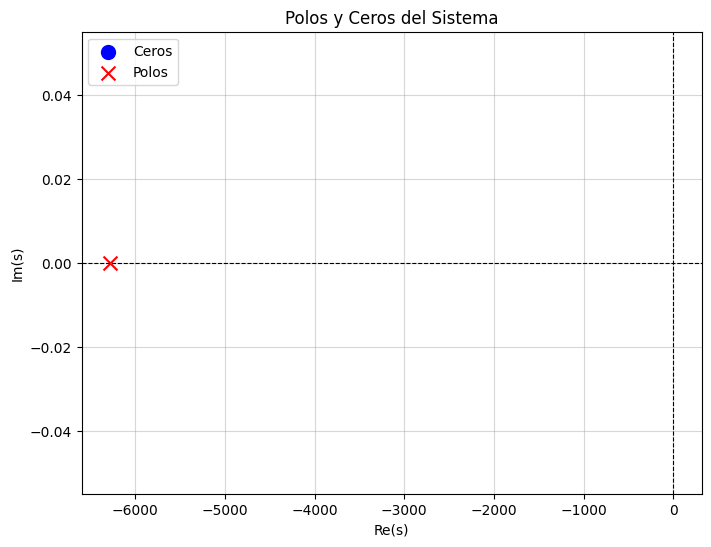

In [4]:
# Parámetros del sistema
s = sym.symbols('s')
R = sym.symbols('R', positive=True)
C = sym.symbols('C', positive=True)
H = 1 / (1 + s * R * C)

# Valores específicos
fc = 1000  # Frecuencia de corte en Hz
R_v = 1000  # Resistencia en ohmios
C_v = 1 / (2 * np.pi * fc * R_v)  # Capacitancia calculada

# Obtener numerador y denominador
num, den = sym.fraction(H)
num_coeffs = sym.Poly(num, s).all_coeffs()
den_coeffs = sym.Poly(den, s).all_coeffs()

# Sustituir valores y convertir a flotantes
num_coeffs = [float(coeff.subs({R: R_v, C: C_v})) for coeff in num_coeffs]
den_coeffs = [float(coeff.subs({R: R_v, C: C_v})) for coeff in den_coeffs]

# Crear el sistema LTI
system = sig.TransferFunction(num_coeffs, den_coeffs)

# Obtener polos y ceros
zeros, poles, _ = sig.tf2zpk(num_coeffs, den_coeffs)

# Graficar polos y ceros
plt.figure(figsize=(8, 6))
plt.scatter(np.real(zeros), np.imag(zeros), color='blue', label='Ceros', s=100, marker='o')
plt.scatter(np.real(poles), np.imag(poles), color='red', label='Polos', s=100, marker='x')
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.axvline(0, color='black', linewidth=0.8, linestyle="--")
plt.title('Polos y Ceros del Sistema')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [5]:
print('Polos:', poles)
print('Ceros:', zeros)
print('Numerador:', num_coeffs)
print('Denominador:', den_coeffs)

Polos: [-6283.18530718]
Ceros: []
Numerador: [1.0]
Denominador: [0.00015915494309189535, 1.0]
